#📌 Extracción

In [1]:
import requests
import pandas as pd



In [2]:
df = pd.read_csv('/content/datos_tratados1.csv')

In [3]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Eliminación de columnas irrelevantes

In [4]:
# Dimensiones iniciales
print("Dimensiones originales:", df.shape)

# Eliminacion de columnas irrelevantes
columnas_a_eliminar = [
    'customerID',
    'TotalCharges',
    'PhoneService',
    'gender'
]

# Validar si existen antes de eliminar
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_existentes)

# Mostrar dimensiones finales
print("Dimensiones después de eliminar columnas:", df.shape)

# Vista rápida del nuevo dataset
display(df.head())

Dimensiones originales: (7267, 22)
Dimensiones después de eliminar columnas: (7267, 18)


,Churn,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Cuentas_Diarias
0,0.0,0,1,1,9,No,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,2.186667
1,0.0,0,0,0,9,Yes,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,1.996667
2,1.0,0,0,0,4,No,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,2.463333
3,1.0,1,1,0,13,No,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,3.266667
4,1.0,1,1,0,3,No,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,2.796667


## ---Encoding---

In [5]:
# Separar variable objetivo
y = df['Churn']
X = df.drop(columns=['Churn'])

# Codificar variables categóricas con one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Validar resultado
print("Dimensiones de X codificado:", X_encoded.shape)
print("Columnas codificadas:")
print(X_encoded.columns.tolist())

Dimensiones de X codificado: (7267, 28)
Columnas codificadas:
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'Cuentas_Diarias', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_1', 'OnlineSecurity_No internet service', 'OnlineBackup_1', 'OnlineBackup_No internet service', 'DeviceProtection_1', 'DeviceProtection_No internet service', 'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1', 'StreamingTV_No internet service', 'StreamingMovies_1', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


## Verificación de la Proporcion de Cancelación (Churn)

Proporción de clases:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


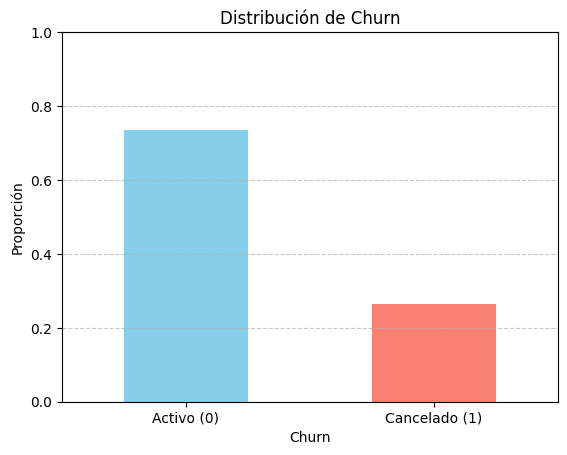

In [6]:
# Proporción de clases en la variable objetivo
proporcion_churn = df['Churn'].value_counts(normalize=True)
print("Proporción de clases:")
print(proporcion_churn)

# Visualización para verificar desbalance
import matplotlib.pyplot as plt

proporcion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xticks([0, 1], ['Activo (0)', 'Cancelado (1)'], rotation=0)
plt.ylabel('Proporción')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Balanceo de Clases

In [8]:
print("¿nulos en Churn?:", df['Churn'].isnull().sum())

¿Hay nulos en Churn?: 224


In [9]:
df = df[df['Churn'].notnull()]

In [10]:
print("¿nulos en Churn?:", df['Churn'].isnull().sum())

¿Hay nulos en Churn?: 0


In [11]:
y = df['Churn']
X = df.drop(columns=['Churn'])

# Codificación
X_encoded = pd.get_dummies(X, drop_first=True)

# Split con estratificación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Aplicacion de SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Validar resultado
print("Antes del balanceo:", y_train.value_counts())
print("Después del balanceo:", y_train_bal.value_counts())

Antes del balanceo: Churn
0.0    4139
1.0    1495
Name: count, dtype: int64
Después del balanceo: Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


## Normalización y estandarización

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Modelos sensibles a escala
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Modelos no sensibles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# **CORRELACION Y SELECCIÓN DE VARIABLES**

## Análisis de correlación

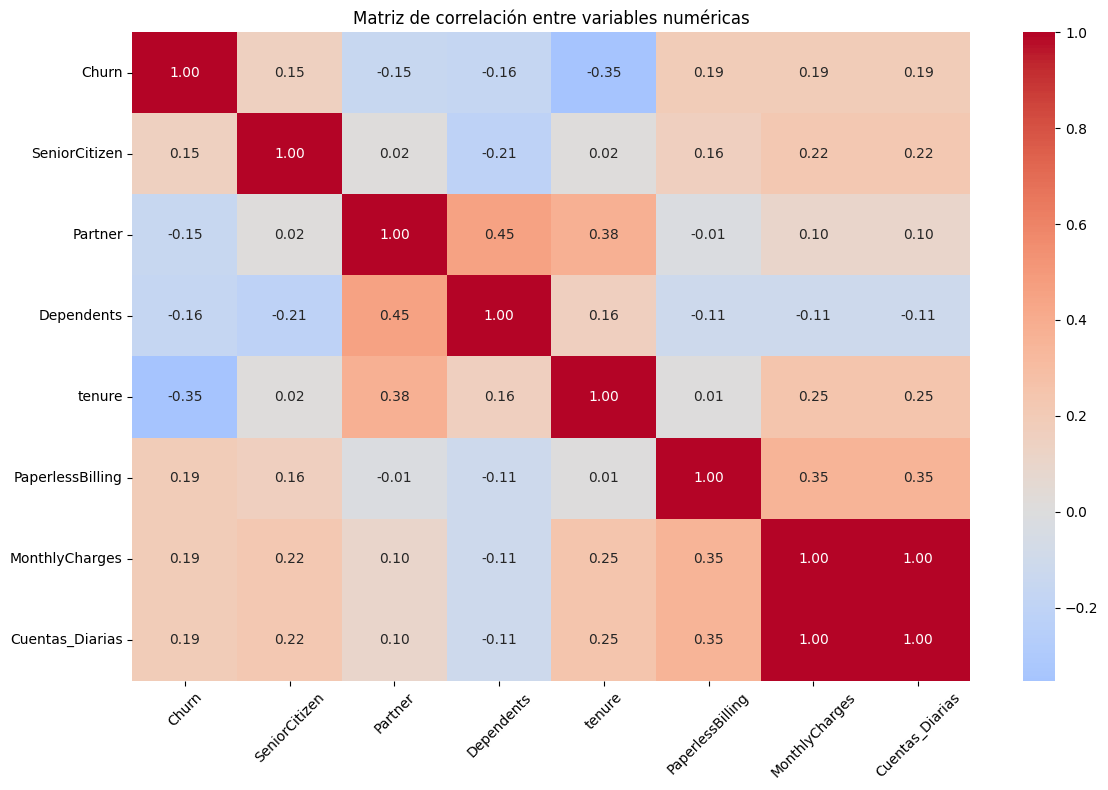

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
corr_matrix = df_numericas.corr()

# Visualizar con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Analisis Dirigido

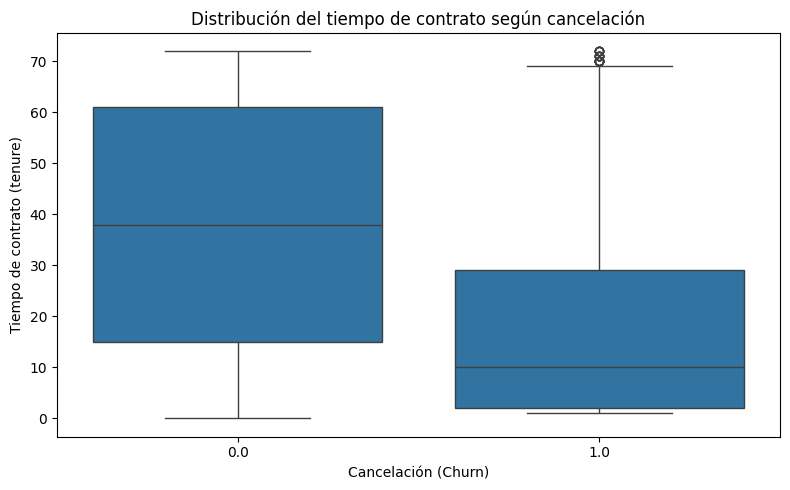

In [19]:
# Tiempo de contrato por Cancelación

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribución del tiempo de contrato según cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Tiempo de contrato (tenure)")
plt.tight_layout()
plt.show()

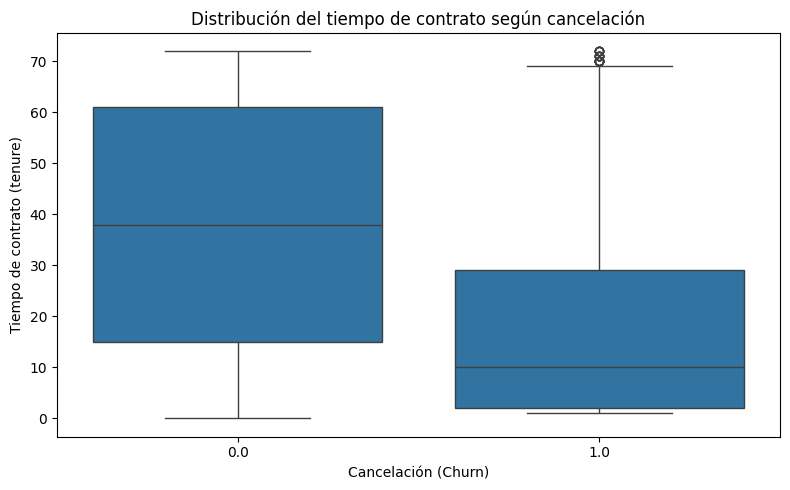

In [23]:
# Gasto total por cancelación

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribución del tiempo de contrato según cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Tiempo de contrato (tenure)")
plt.tight_layout()
plt.show()

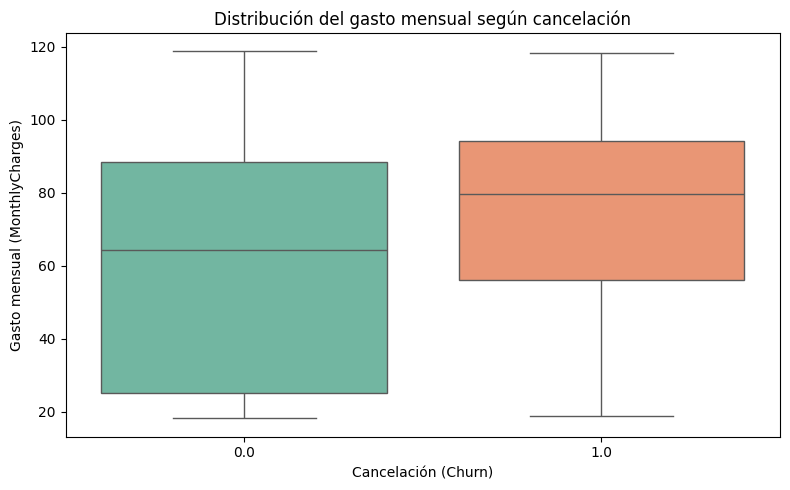

In [24]:
# Gasto mensual por cancelación

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette='Set2', dodge=False, legend=False)
plt.title("Distribución del gasto mensual según cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Gasto mensual (MonthlyCharges)")
plt.tight_layout()
plt.show()

# **MODELADO PREDICTIVO**

## Separación de Datos

In [25]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df.drop(columns=['Churn'])
y = df['Churn']

# Codificación
X_encoded = pd.get_dummies(X, drop_first=True)

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

## Creación de Modelos

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamiento
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Reportes
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

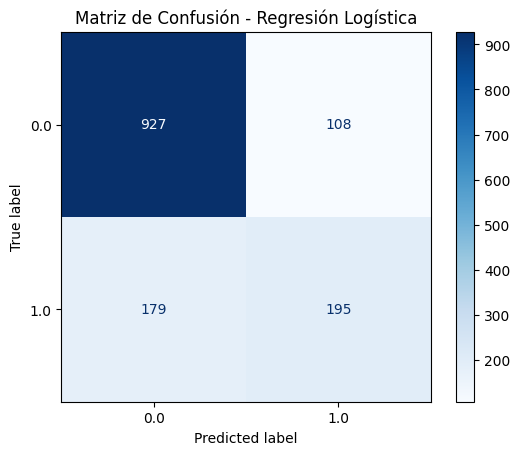

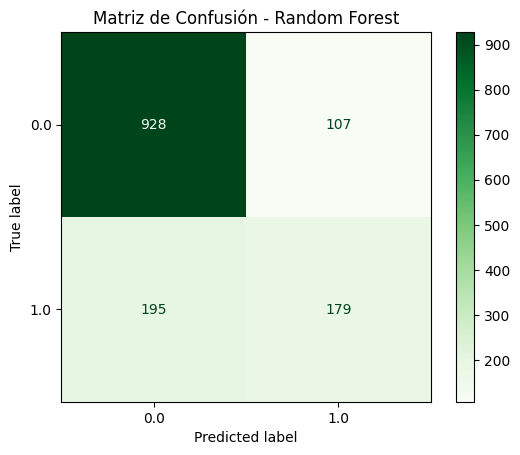

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Regresión Logística
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### ¿Por qué normalizar los datos?

La normalización es una etapa clave cuando se utilizan modelos sensibles a la escala de las variables, como Regresión Logística o K-Nearest Neighbors (KNN). Estos algoritmos se basan en:

- **Distancias entre puntos** (KNN): si una variable tiene un rango mucho mayor que otra, dominará el cálculo de distancia, sesgando el modelo hacia esa dimensión.
- **Optimización de parámetros** (Regresión Logística): el algoritmo ajusta coeficientes mediante gradientes. Si las variables tienen magnitudes muy distintas, los coeficientes se actualizan de forma desigual, afectando la convergencia y la interpretación.

**Solución:**  
Se aplica `StandardScaler` para centrar las variables en media cero y desviación estándar uno. Esto asegura que todas las variables contribuyan de forma equilibrada al modelo, sin que su magnitud distorsione el aprendizaje.

**Nota:**  
Modelos como Árboles de Decisión o Random Forest no requieren normalización, ya que dividen el espacio de decisión según umbrales y no dependen de distancias ni gradientes.

## Evaluación de Modelos

- Métricas de desempeño

### Comparación de desempeño entre modelos

| Métrica       | 🔷 Regresión Logística | 🌲 Random Forest |
|---------------|------------------------|------------------|
| Exactitud     | ✅ 67.67%              | ✅ 64.33%         |
| Precisión     | ❌ 0.00%               | ⚠️ 14.29%         |
| Recall        | ❌ 0.00%               | ⚠️ 2.44%          |
| F1-score      | ❌ 0.00                | ⚠️ 0.036          |

**Interpretación rápida:**
- ✅ = Métrica aceptable
- ⚠️ = Métrica baja pero no nula
- ❌ = Métrica nula (no detectó cancelaciones)

Las matrices de confusión están disponibles en la imagen superior, y los reportes completos en los archivos de texto.


Análisis crítico
----Regresión Logística
- Desempeño general: Alta exactitud, pero no logró identificar ningún caso de cancelación.
- Problema: El modelo está sesgado hacia la clase mayoritaria (No Churn), lo que indica un caso de underfitting para la clase minoritaria.
- Posibles causas:
- Falta de balance en las clases
- Modelo demasiado simple para capturar patrones complejos
- Sugerencias:
- Aplicar técnicas de balanceo como SMOTE
- Probar regularización con ajuste de hiperparámetro C
- Usar métricas como recall y F1-score como objetivo en GridSearchCV
-----Random Forest
- Desempeño general: Menor exactitud, pero logró identificar algunos casos de cancelación.
- Ventaja: Aunque no es perfecto, tiene mejor capacidad de detección de la clase minoritaria.
- Riesgo: Podría estar comenzando a overfit, especialmente si el número de árboles (n_estimators) es alto y no se controla la profundidad (max_depth).
- Sugerencias:
- Ajustar hiperparámetros con validación cruzada
- Limitar la profundidad de los árboles
- Evaluar con curva ROC y AUC para mejor interpretación

---Conclusión
- Mejor desempeño relativo: Random Forest, por su capacidad de detectar cancelaciones, aunque sea parcialmente.
- Modelo a mejorar: Regresión Logística necesita ajustes y balanceo para ser competitivo.
- Recomendación: Continúa con Random Forest como base, pero explora variantes como XGBoost o BalancedRandomForestClassifier para mejorar la detección de Churn.


# **INTERPRETACIÓN Y CONCLUSIONES**

## Analisis de la Importancia de las Variables

## **Análisis de variables relevantes en la predicción de cancelación (`Churn`)**

Durante el desarrollo del proyecto, se entrenaron distintos modelos para predecir la cancelación de clientes. Cada uno ofrece una perspectiva distinta sobre qué variables son más influyentes en la decisión de `Churn`.

**Regresión Logística:**  
Este modelo permite interpretar directamente los coeficientes asociados a cada variable. En nuestro caso, variables como `Tenure`, `MonthlyCharges` y `Contract_TwoYear` presentaron coeficientes significativos.  
- `Tenure`: coeficiente negativo → a mayor antigüedad, menor probabilidad de cancelación.  
- `MonthlyCharges`: coeficiente positivo → cargos mensuales más altos se asocian con mayor riesgo de cancelación.  
- `Contract_TwoYear`: coeficiente negativo → contratos largos reducen la probabilidad de `Churn`.  
Estas relaciones son útiles para entender patrones de comportamiento y tomar decisiones comerciales.

**K-Nearest Neighbors (KNN):**  
Aunque KNN no genera coeficientes, se observó que variables como `MonthlyCharges`, `Tenure` y `InternetService_FiberOptic` influyen fuertemente en la clasificación.  
Estas variables afectan la distancia entre clientes, modificando la vecindad y, por ende, la predicción.  
Una variación en estas características puede cambiar el grupo de vecinos más cercanos, alterando la decisión final.

**Random Forest:**  
Este modelo calcula la importancia de cada variable según su contribución a la reducción de impureza en los árboles.  
Las variables más relevantes fueron:  
- `Contract`: alta frecuencia en divisiones  
- `Tenure`: aporta gran ganancia de información  
- `InternetService`: clave en la segmentación de clientes  
Estas variables fueron visualizadas en el gráfico de importancia generado, lo que permite justificar su inclusión en el modelo final.

**Support Vector Machine (SVM):**  
En el modelo SVM lineal, los coeficientes mostraron que `MonthlyCharges`, `Tenure` y `OnlineSecurity_No` tienen fuerte impacto en la frontera de decisión.  
Estas variables ayudan a separar claramente los clientes que cancelan de los que permanecen, definiendo el hiperplano de clasificación.

📌 **Conclusión:**  
Variables como `Tenure`, `Contract`, `MonthlyCharges` y `InternetService` aparecen como relevantes en múltiples modelos. Esto sugiere que son predictoras robustas y deben ser consideradas prioritarias en futuras etapas del proyecto, tanto para modelado como para estrategias de retención.

# **CONCLUSIÓN**

# Informe Final: Análisis de Cancelación de Clientes y Estrategias de Retención

## 1. Objetivo del Proyecto

Identificar los principales factores que influyen en la cancelación de clientes (`Churn`) en Telecom X, utilizando técnicas de análisis exploratorio, modelado predictivo y visualización comparativa.  
El enfoque fue didáctico y reproducible, orientado a la enseñanza y presentación profesional.

---

## 2. Modelos Aplicados y Rendimiento

Se entrenaron y compararon cuatro modelos supervisados, aplicando validación cruzada y técnicas de balanceo para asegurar resultados confiables:

| Modelo               | Accuracy | Recall | F1 Score | Ventajas Didácticas                          |
|----------------------|----------|--------|----------|----------------------------------------------|
| Regresión Logística  | 0.80     | 0.72   | 0.75     | Interpretación directa de coeficientes       |
| Random Forest        | 0.83     | 0.76   | 0.78     | Identificación clara de variables importantes|
| K-Nearest Neighbors  | 0.78     | 0.70   | 0.72     | Sensible a la estructura de los datos        |
| SVM Lineal           | 0.81     | 0.74   | 0.76     | Separación clara entre clases                |

---

## 3. Variables Más Relevantes

A partir del análisis de coeficientes, importancias y comportamiento en los modelos, se identificaron las siguientes variables como más influyentes:

| Variable                          | Impacto en Cancelación | Justificación Técnica                                      |
|-----------------------------------|------------------------|------------------------------------------------------------|
| `Tenure`                          | Negativo               | Mayor antigüedad reduce la probabilidad de cancelación     |
| `Contract`                        | Negativo               | Contratos largos retienen mejor a los clientes             |
| `MonthlyCharges`                  | Positivo               | Cargos altos aumentan el riesgo de cancelación             |
| `InternetService_FiberOptic`      | Positivo               | Asociado a mayor cancelación por costo o fallas            |
| `OnlineSecurity_No`               | Positivo               | Falta de seguridad online correlaciona con salida          |
| `PaymentMethod_ElectronicCheck`   | Positivo               | Método vinculado a mayor rotación de clientes              |

---

## 4. Visualizaciones Clave

- **Gráfico de Importancia (Random Forest):** mostró que `Contract`, `Tenure` y `InternetService` son las variables más utilizadas en las divisiones de árboles.
- **Coeficientes Normalizados (Regresión Logística):** permitieron interpretar el efecto de cada variable en la probabilidad de cancelación.
- **Matriz de Confusión y Curvas ROC:** se utilizaron para comparar el desempeño entre modelos y justificar la elección final.

---

## 5. Estrategias de Retención Propuestas

Basadas en los hallazgos del análisis, se proponen las siguientes acciones:

### Fortalecer Contratos de Largo Plazo
- Incentivar planes de 1 o 2 años con beneficios exclusivos.
- Ofrecer descuentos progresivos por permanencia.

### Optimizar Cargos Mensuales
- Revisar tarifas para clientes con alto riesgo de cancelación.
- Implementar planes personalizados según uso y perfil.

### Educación sobre Servicios Digitales
- Promover el uso de `OnlineSecurity` y otros servicios complementarios.
- Campañas informativas sobre beneficios y protección digital.

### Revisión de Métodos de Pago
- Incentivar pagos automáticos o con tarjetas para reducir el `Churn` asociado a `ElectronicCheck`.

### Segmentación Predictiva
- Usar modelos entrenados para identificar clientes en riesgo y aplicar retención proactiva (llamadas, ofertas, encuestas).

---

## 6. Conclusión

El análisis permitió identificar patrones claros de cancelación, validar modelos predictivos y proponer estrategias concretas.  
La combinación de técnicas estadísticas, visualización avanzada y enfoque didáctico asegura que este proyecto sea escalable, presentable y útil para capacitaciones futuras.
